<a href="https://colab.research.google.com/github/Anuj0918/Credit_Card_FraudDetection-/blob/main/Credit_card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/creditcard.csv'

In [ ]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0


In [ ]:
credit_card = data.head(int((data.shape[0]*0.8)//1))
credit_card_test = data.tail(int((data.shape[0]*0.2)//1))

In [ ]:
fraud = pd.DataFrame([credit_card.loc[i] for i in range(credit_card.shape[0]) if credit_card.loc[i]['Class'] == 1])
non_fraud = pd.DataFrame([credit_card.loc[i] for i in range(credit_card.shape[0]) if credit_card.loc[i]['Class'] == 0])

In [ ]:
X, y = credit_card.drop(["Class"], axis=1), credit_card['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14336,-0.458125,0.526752,1.048709,-1.247393,0.600103,-0.123620,0.262488,-0.015757,1.183262,...,-0.170665,-0.152016,-0.283739,-0.086610,-0.844555,-0.899558,0.630427,-0.041481,0.133325,17.68
9563,14338,-1.803279,0.101064,1.509077,-0.760388,-1.766393,0.644461,-2.738748,-3.529287,4.902921,...,-1.522169,2.969896,-0.281443,-5.110558,0.762979,-1.853282,-0.557814,0.885812,0.145876,570.49
9564,14351,-0.578749,1.443737,1.349766,0.210319,0.148132,-0.957969,0.631105,-0.180469,0.979290,...,0.239666,-0.437191,-0.842197,-0.004231,0.288792,-0.109466,0.035697,0.330176,0.156184,1.78
9565,14355,-0.987948,-3.254219,0.297985,3.551207,-1.520072,1.522722,0.454356,0.213944,1.291760,...,1.836018,0.444635,-0.817046,-0.881614,-0.360627,-0.233188,-0.157131,-0.183682,0.193721,1062.72


In [ ]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X,y)

In [ ]:
X_resampled = (X_resampled-X_resampled.min())/(X_resampled.max()-X_resampled.min())

In [ ]:
resampled_train = pd.concat([X_resampled,y_resampled],axis=1)

In [ ]:
# I use correlation matrix to look at how target column is responding to the features using a seaborn plot and create a rough picture of which features are useful.
sns.set(rc={'figure.figsize':(25,21)})

<Axes: >

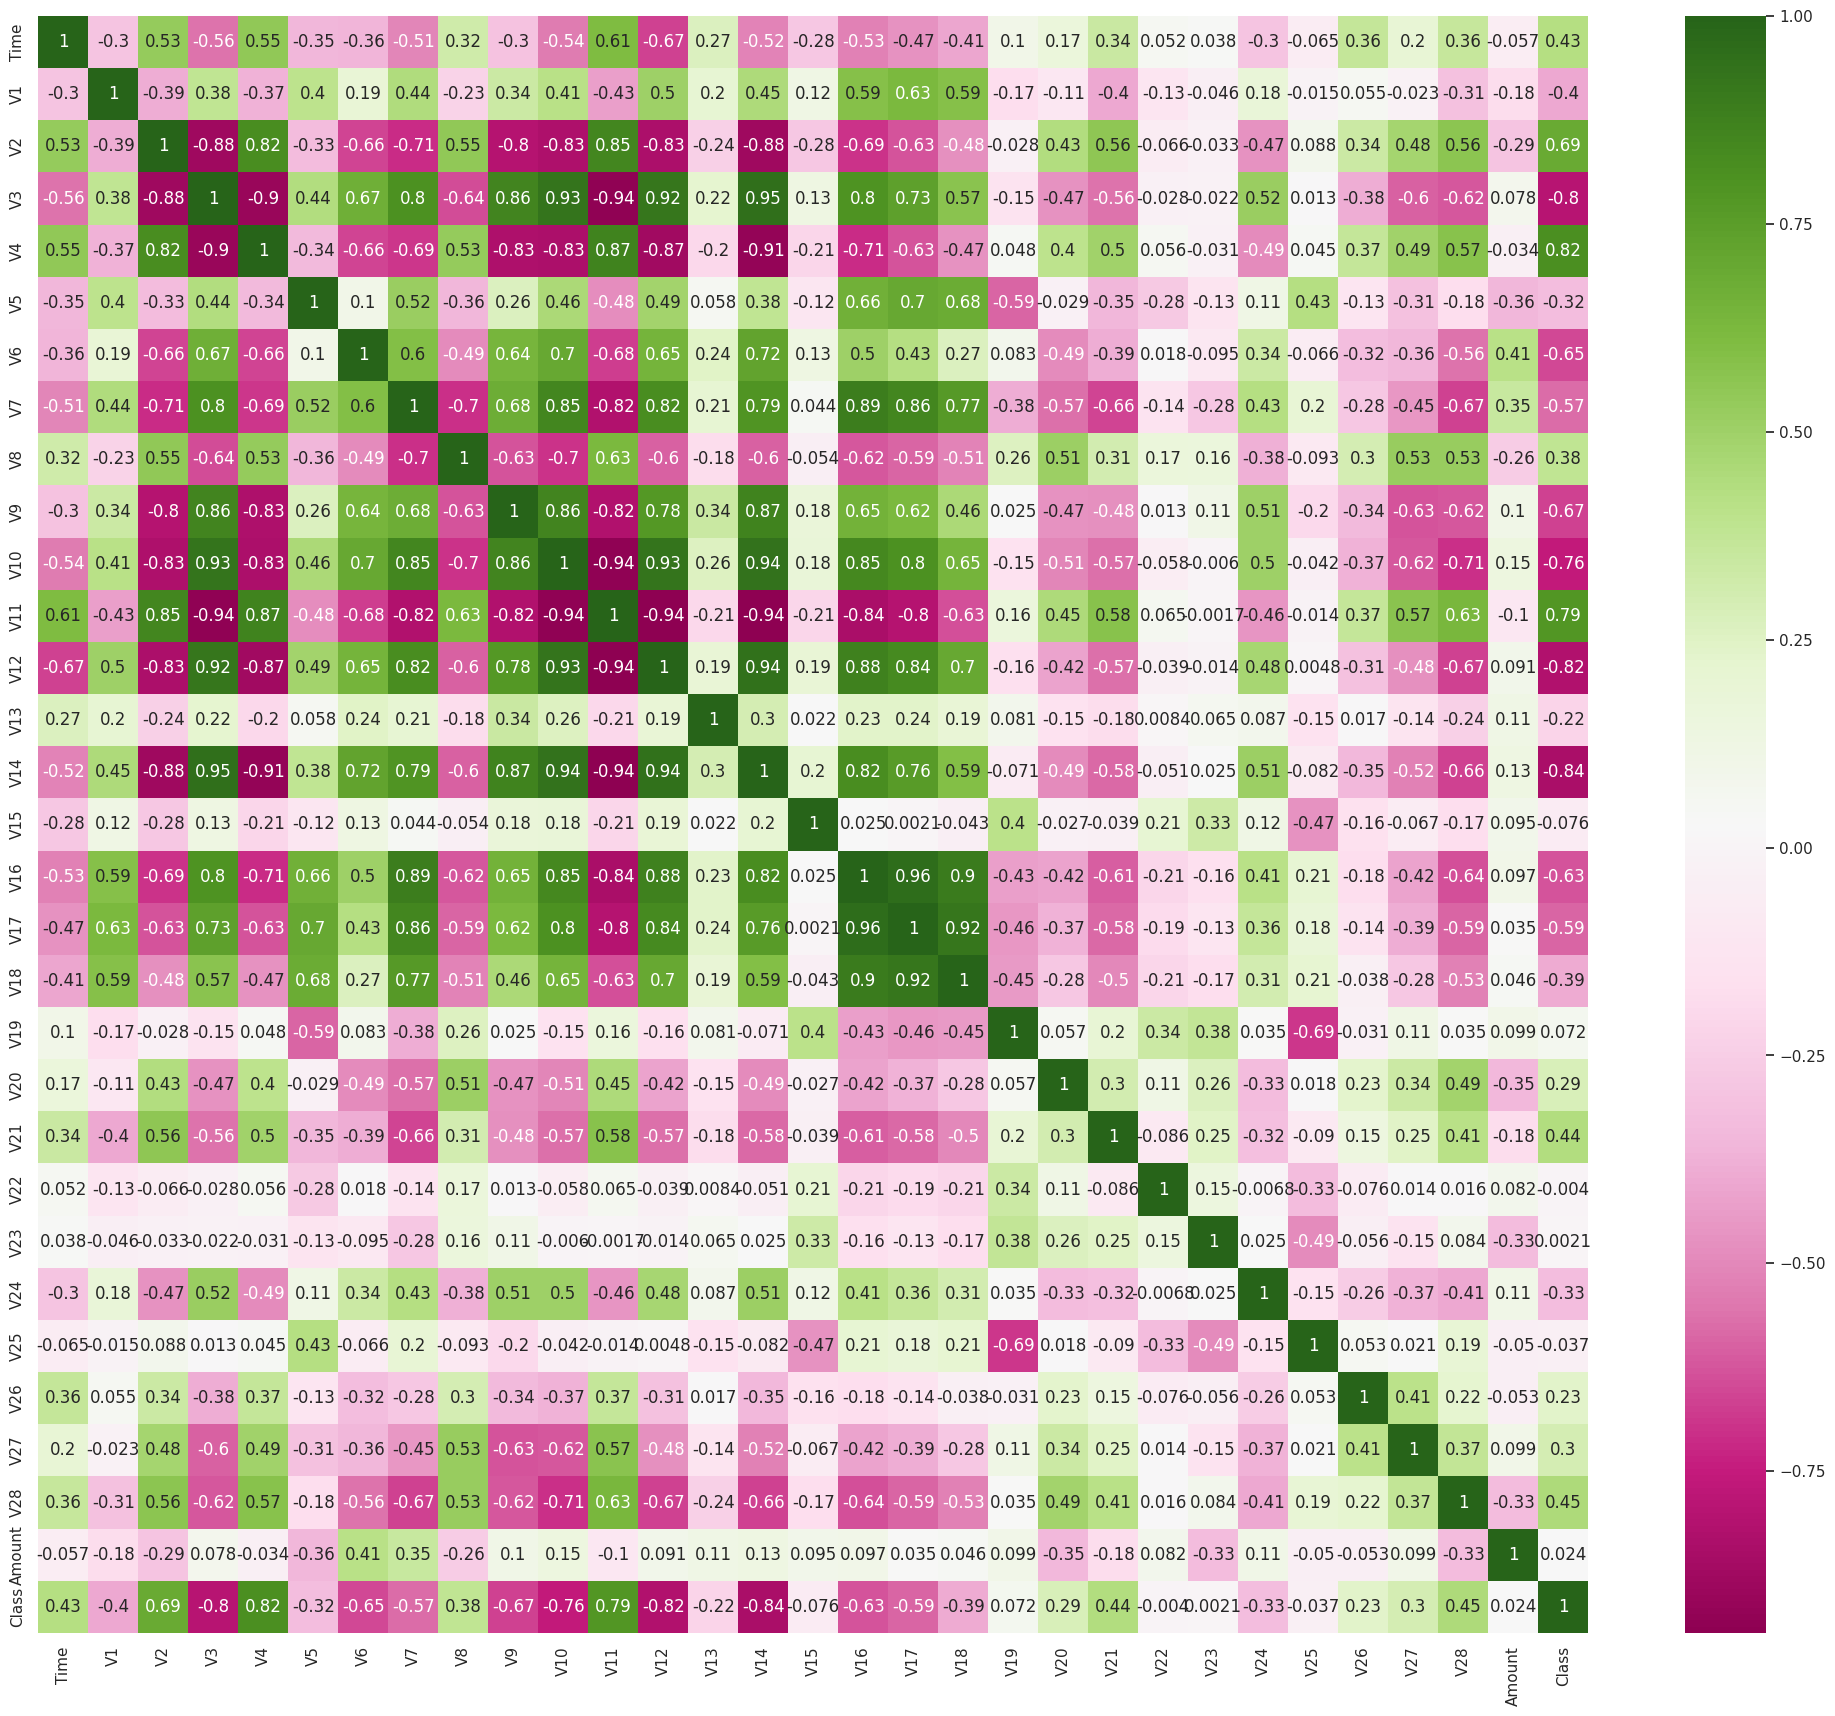

In [ ]:
sns.heatmap(resampled_train.corr(), cmap = 'PiYG', annot=True)

In [ ]:
select = SelectKBest(chi2, k='all')
select.fit_transform(X_resampled, y_resampled)
scores = select.scores_

In [ ]:
scores_dict = {}
for i in range(len(scores)):
    scores_dict[X_resampled.columns[i]] = scores[i]

score_dict_sorted = {k:v for k,v in sorted(scores_dict.items(), key= lambda x: x[1], reverse=True)}

In [ ]:
score_dict_sorted

{'V11': 1701.5471302376754,
 'V14': 1393.4658399460686,
 'V12': 1383.1902529131212,
 'V4': 1201.364693840087,
 'V3': 1020.750867978653,
 'V10': 698.711782610219,
 'V16': 571.0560459009725,
 'Time': 549.49953243924,
 'V9': 477.3790169185593,
 'V17': 462.75056689703035,
 'V18': 195.5069344221911,
 'V24': 54.30747455255313,
 'V7': 43.745074942487435,
 'V2': 37.69750998211657,
 'V26': 30.907634686725743,
 'V13': 29.124108506374853,
 'V6': 23.63555423223462,
 'V28': 18.99008768085352,
 'V1': 14.749244975144222,
 'V8': 10.156307483123054,
 'V27': 9.016621609242794,
 'V21': 7.524166590976153,
 'V5': 3.3147274247967227,
 'V15': 3.3012942018655553,
 'V19': 3.131628258510605,
 'V20': 3.0343716566210537,
 'Amount': 1.2531247048372025,
 'V25': 0.9417913219000523,
 'V22': 0.0007640464231740926,
 'V23': 6.0984737605646684e-05}

In [ ]:
features = [k for k,v in score_dict_sorted.items() if v > 2000]

In [ ]:
X_train = X_resampled[features]
y_train = y_resampled

In [ ]:
credit_card = data.head(int((data.shape[0]*0.8)//1))
credit_card_test = data.tail(int((data.shape[0]*0.2)//1))

NameError: name 'data' is not defined

In [ ]:
X_test = credit_card_test.drop(['Class'],axis=1)[features]
X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())
y_test = credit_card_test['Class']

NameError: name 'credit_card_test' is not defined

In [ ]:
#In order to compare performance, I have used three famous classifiers from sklearn
# I use two famous classifier 1. Decision Tree
# 2. Random Forest
#I compare them in three different ways:

#How good is their precision-recall graph?
#How much is their area under ROC (Receiver Operating Characteristic) curve i.e., a curve of True Positives and False positives.

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier1 = DecisionTreeClassifier(min_samples_split = 2)
classifier2 = RandomForestClassifier(n_estimators=500, min_samples_split = 2, verbose=1, )

In [ ]:
y_pred1 = classifier1.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
y_pred1 = classifier1.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score